# Lab 1: Sampling and coding basics

This lab aims to get familiar with the basics of audio sampling and of coding audio signals, listening to its effect.

Make sure you understand all the code given and its signal processing task before answering the questions. Use headphones to listen to the sounds when doing the different exercises.

To do the labs best is to use Visual Studio Code, cloning this repository, `git clone https://github.com/xserra/audio-coding-materials.git`, and installing the material as described in the README file of the repository. You should submit the python notebook through the Aula Global. The notebooks should be selfcontained.

## Relevant concepts:

### Spectrum
The magnitude spectrum of a sound fragment describes the magnitudes of its sinusoidal components as a function of frequency.

### Spectrogram
The magnitude spectrogram of a sound is a visual way to represent a sequence of magnitude spectra computed over a whole sound, thus showing the time-varying nature of a sound.

### Sampling Rate
Number of samples of a signal taken every second. It defines the frequency range obtained.

### Bit depth
Number of bits used to represent every sample of a signal. It defines the dynamic range obtained.

### Resampling
Changing the sampling rate of a signal. It is first important to filter out the frequencies that cannot be represented in the new sampling rate.

### Quantization
Changing the number of bits used to represent every sample of a signal.

### MP3
Formally MPEG-1 Audio Layer III is a coding format for digital audio commonly used on internet applications.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft
import IPython.display as ipd
from scipy.io.wavfile import read
from pydub import AudioSegment

In [2]:
# functions used in the whole lab
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def display_sound(sound_array, sampling_rate=44100):
  """ Display signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # plot the waveform of the sound
  plt.figure(0, figsize=(10, 3))
  time_indexes = np.arange(0, sound_array.size/sampling_rate, 1.0/sampling_rate)
  plt.plot(time_indexes, sound_array)
  plt.xlabel('time (seconds)')
  plt.ylabel('amplitude')
  plt.show()
  # play the sound
  ipd.display(ipd.Audio(data=sound_array, rate=sampling_rate))

def display_spectrum(sound_array, sampling_rate=44100):
  """ Display magnitude spectrum of signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # compute the hanning window
  window = signal.get_window('hann', sound_array.size)
  # compute the spectrum of the windowed input signal
  spectrum = fft(window*sound_array)
  # compute the magnitude spectrum in dB
  magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))

  # plot the magnitude spectrum
  plt.figure(0, figsize=(10, 5))
  frequency_indexes = np.arange(0, sampling_rate/2, sampling_rate/spectrum.size)
  plt.plot(frequency_indexes, magnitude_spectrum)
  plt.xlabel('frequency (Hz)')
  plt.ylabel('amplitude (dB)')
  plt.show()

def display_spectrogram(sound_array, hop_size=256, fft_size=512, sampling_rate=44100):
  """ Display magnitude spectrogram of signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      hop_size (int): window hop size
      fft_size (int): Spectrogram fft size
      sampling_rate (int): Sampling rate of sound
  """
  # compute the hanning window
  window = signal.get_window('hann', fft_size)
  # initialize the output spectrogram
  magnitude_spectrogram = []
  sample_index = 0
  # iterate over the input sound computing a sequence of spectra
  while sample_index < sound_array.size-fft_size:
    spectrum = fft(window*sound_array[sample_index:sample_index+fft_size])
    magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))
    magnitude_spectrogram.append(magnitude_spectrum)
    sample_index += hop_size

  # plot the magnitude spectrogram
  plt.figure(figsize=(10, 5))
  time_indexes = np.arange(0, sample_index/sampling_rate, hop_size/sampling_rate)
  frequency_indexes = np.arange(0, sampling_rate/2, sampling_rate/fft_size)
  plt.pcolormesh(time_indexes, frequency_indexes, np.transpose(magnitude_spectrogram), shading='nearest', cmap='inferno')
  plt.colorbar(format='%+2.0f dB')
  plt.xlabel('time (seconds)')
  plt.ylabel('frequency (Hz)')
  plt.show()

## Part 1- Reading and plotting an audio file

Read and plot an audio file from the 'sounds' directory, 'synthetic.wav'. Listen to the sound and plot its waveform, plot a magnitude spectrum of a sound fragment, and the magnitude spectrogram of the whole sound. For both the spectrum and the spectrogram try different values of the `fft_size`: 256, 1024, and 2048. Answer the questions given and modify the code to support your answers.

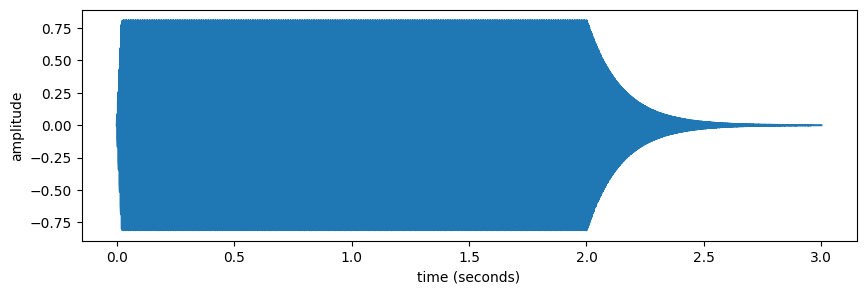

In [3]:
# read and display a sound
sound_array, sampling_rate = read_sound('../sounds/synthetic.wav')
display_sound(sound_array, sampling_rate)

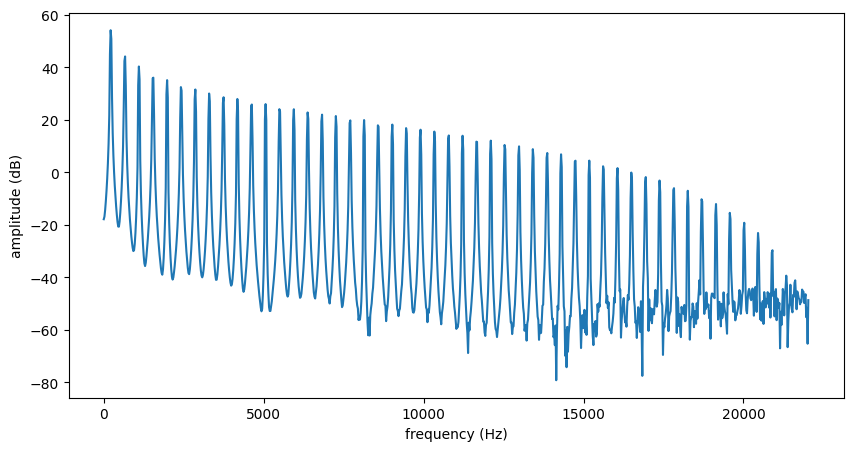

In [4]:
# display spectrum of a stable fragment of sound_array, try different values for fft_size, all being a power of 2
# ex: 256, 1024, 2048
fft_size = 2048
sample_offset = int(1.0 * sampling_rate) # choose the starting sample at 1 second
display_spectrum(sound_array[sample_offset:sample_offset+fft_size], sampling_rate)

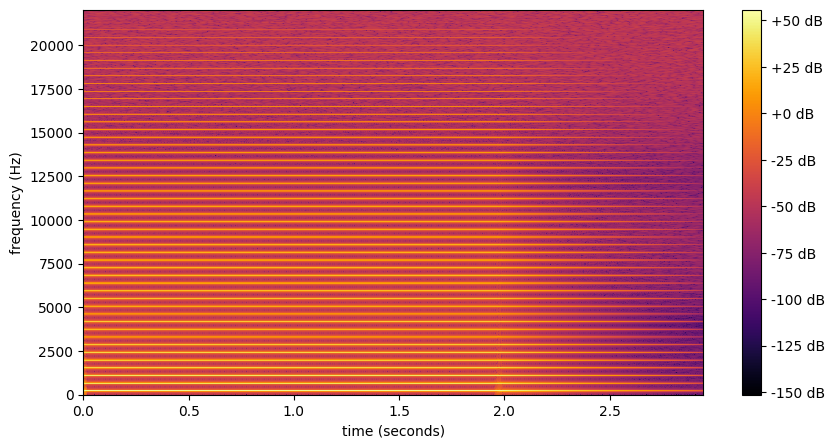

In [5]:
# display spectrogram of x, try different values for fft_size, all being a power of 2
# ex: 256, 1024, 2048
hop_size = 128
fft_size = 2408
display_spectrogram(sound_array, hop_size, fft_size, sampling_rate)

**Questions: (answer them in this text cell)**

1. Explain the effect of the different fft_size values in the spectrum and spectrogram displays of the `synthetic.wav` sound. Example values to try: 256, 1024, 2048. Modify the code above as necessary and refer to it and to the resulting plots to support the explanation.

In the spectrum, which represents the magnitude spectrum of a sound that describes the magnitudes of its sinusoidal components as a function of frequency, using a larger fft size (such as 2048) provides a clearer view of the harmonics and more detailed frequency information. For smaller fft sizes, such as 256, the spectrum loses detail, and the harmonics become less distinguishable. The peaks are broader and less defined, resulting in a less precise representation of the frequency content.

For the spectogram, which visually represents a sequence of magnitude spectra computed over a whole sound, the fft size is also important. For small fft_size (such as 256) the spectrogram appears blurrier, and it becomes difficult to clearly separate and identify harmonics. For higher fft size as 2048, produces a spectrogram with much clearer separation of the frequency components, making the harmonics easier to distinguish. However, while the frequency resolution improves, the time resolution decreases, meaning the abrupt changes in the signal are less well captured.
 
2. What is the fundamental frequency, in Hz, of the `synthetic.wav` sound?. Explain how you identifyied it. Modify or add any code and plots above to support your answer.
 
The fundamental frequency of the synthetic.wav sound is approximately 250 Hz. To identify this, I first adjusted the FFT size to 2048, which provided a higher frequency resolution that allowed to observe the harmonic structure in the spectrum.

Then after looking into the spectrum, the first peak normally corresponds to the fundamental frequency. In this case, the first significant peak appeared around 250 Hz, confirming that as the fundamental frequency. 



----

## Part 2 - Resample sound

Resample (decimate) and change the bits per sample (quantize) a sound signal by different amounts and compare the results. Find the highest compression that still keeps the perceptual qualities of the original sound. Answer the questions given and modify the code as needed.

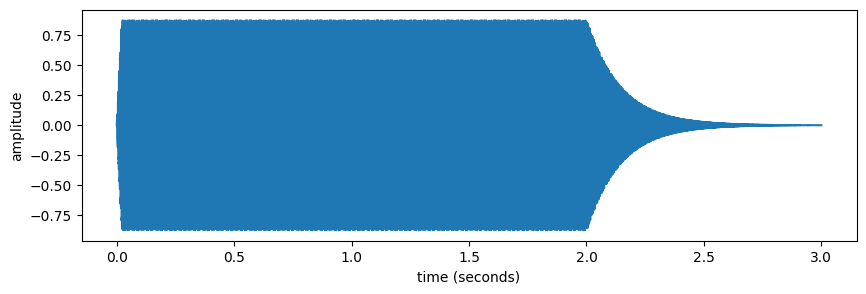

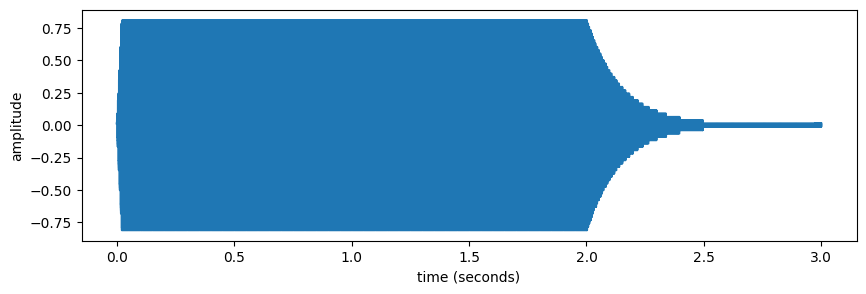

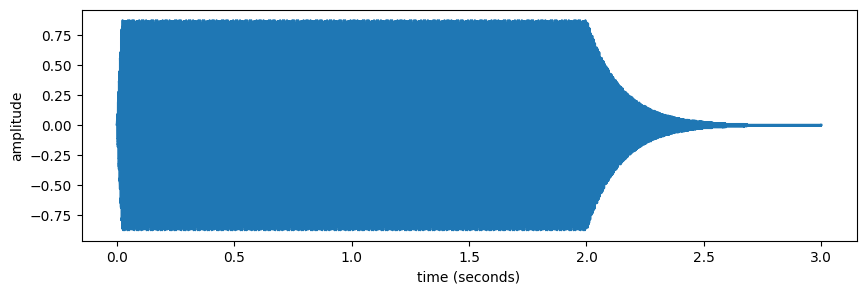

In [6]:
def quantize_signal(x, original_bits, target_bits):
  """Quantizes a signal x, assuming it originally had original_bits bits per sample, to target_bits per sample.
  Args:
    x (numpy.array): Array of samples as floating point values between -1 and 1
    original_bits (int): Number of bits of the signal that x represents
    target_bits (int): Number of bits per sample of the output signal
  """
  # Scaling the signal to the range of [0, 2^target_bits - 1]
  x_scaled = (x - np.min(x)) / (np.max(x) - np.min(x)) * (2**target_bits - 1)
  # Quantize by rounding
  x_quantized = np.round(x_scaled)
  # Re-scaling back to the original amplitude range
  x_output = (x_quantized / (2**target_bits - 1)) * (np.max(x) - np.min(x)) + np.min(x)
  return x_output

# change the decimate_factor (dowmnsample the sound) and find the lowest sampling rate for which you do not hear a difference
decimate_factor = 2  # 2 means reducing the sampling rate to half of the original
decimated_sound_array = signal.decimate(sound_array, decimate_factor)
display_sound(decimated_sound_array, sampling_rate/decimate_factor)

# change the number_of_bits of the samples and find the lowest number for which you do not hear a difference
number_of_bits = 6   # 8 means to reduce the number of bits per sample to half of the original, which is 16
quantized_sound_array = quantize_signal(sound_array, 16, number_of_bits)
display_sound(quantized_sound_array, sampling_rate)

# change the decimate_factor (dowmnsample the sound) and the number_of_bits (quantize)
# to find the most compressed signal for which you do not hear a difference
number_of_bits = 8
decimate_factor = 2
decimated_and_quantized_sound_array= quantize_signal(signal.decimate(sound_array, decimate_factor), 16, number_of_bits)
display_sound(decimated_and_quantized_sound_array, sampling_rate/decimate_factor)


**Questions: (answer in this text cell)**

1. Modify the decimation factor applied to the `synthetic.wav`. What is the biggest decimation for which you do not hear a difference? Change the demination factor in the code and explain the result supporting your answer with any needed plot. Use both the waveform and the spectrum.

The process of decimation (downsampling the sound) involves reducing the sampling rate of the audio signal. The initial decimation factor 2, which halves the sampling rate, the sound it still clear and similar form the original one.

As I increased the decimation factor, I began to notice differences as the sound gradually became quieter and more muffled, losing some of its clarity. After testing various factors, I found that the largest decimation factor for which I could not hear the difference was 2.

2. Modify the quantization applied to the `synthetic.wav`. What is the biggest quantization for which you do not hear a difference?. Change the number of bits in the code and explain your answer supporting it with any needed plot.

To modify the quantization applied to the synthetic.wav file, I adjusted the number of bits used to represent each sample. The goal is to find the lowest bit depth at which the audio quality remains perceptually unchanged.

The initial quanzation is 8, wich means to reduce the number of bits per sample to half of the original, which is 16. By progressively decreasing the bit depth , I found that the lowest bit depth where I could no longer hear a noticeable difference in sound quality was 7 bits. Below the audio began to exhibit noticeable quantization noise.

2. Compress the sound `synthetic.wav` by applying both decimation and quantization. What it the highest compression factor you get without losing the perceptual quality of the original sound when performing both a decimation and a quantization?. Explain your answer supporting it with any needed plot.

To compress the synthetic.wav sound file, I applied both decimation (downsampling) and quantization (reducing bit depth). The goal was to find the highest compression factor where the audio quality remains perceptually similar to the original, without introducing noticeable artifacts.

Knowing the information that we extract from the other exercices, now we can change the paramaters for the decimate_factor (dowmnsample the sound) and the number_of_bits (quantize) in orther to find the most compressed signal for which I do not hear a difference.

For decimation, I found that a decimation factor of 2 maintained the audio clarity without perceptible loss in quality. Increasing the decimation to 3 introduced noticeable differences, such as a reduction in loudness and clarity, making the sound quieter and less distinct.For quantization, I determined that the lowest bit depth at which I could no longer hear a difference was 7 bits. 

---

## Part 3 - Apply audio coding
Compress an audio signal with mp3, using different bit rates to control the compression. Find the lowest bit rate for which you do not hear a difference. Change the code as needed and answer the questions given.

In [7]:
from pydub import AudioSegment
AudioSegment.ffmpeg = "C:/ffmpeg/bin/ffmpeg.exe"


wav file size: 264644 bytes
mp3 file size: 36719 bytes


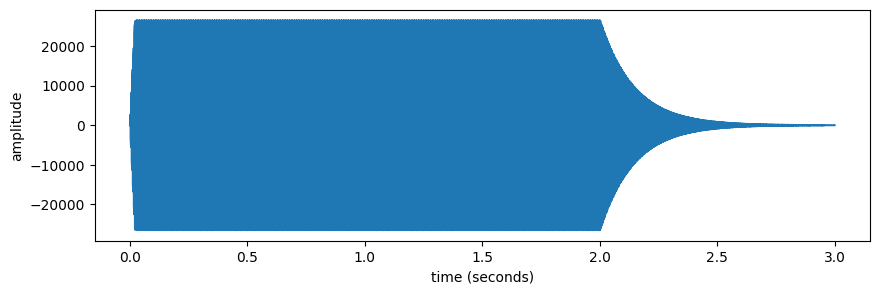

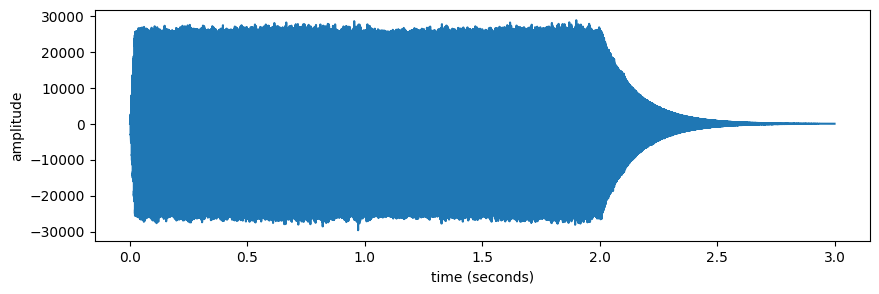

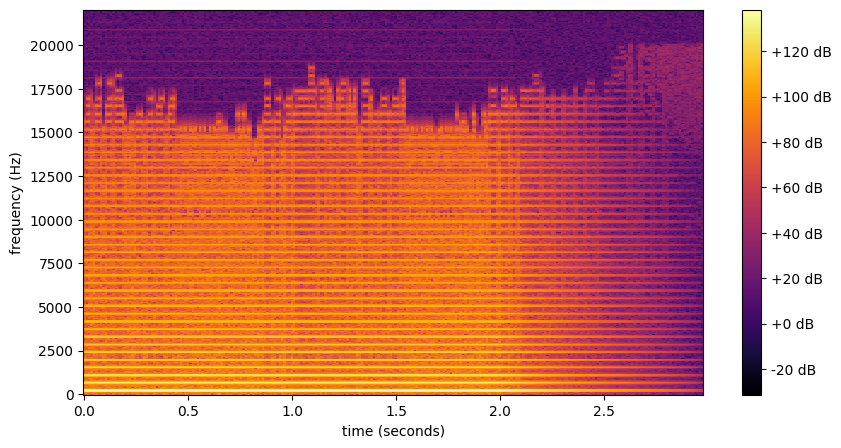

Compression Factor: 7.207276886625452
Compression Factor (bit rate): 14.700000000000001


In [21]:
# read the audio file using AudioSegment
audio1 = AudioSegment.from_wav('../sounds/synthetic.wav')
wav_file_size = os.path.getsize('../sounds/synthetic.wav')
print(f'wav file size: {wav_file_size} bytes')

# change the bit_rate used in the compression, try: 256kbits/s, 192kbits/s, 96kbits/s, 32kbits/s.
# find the lowest bitrate for which you do not hear a difference
bit_rate ="96k"

# compress the sound with mp3
audio1.export('synthetic.mp3', format="mp3", bitrate=bit_rate)

# read the compressed mp3 file
audio2 = AudioSegment.from_mp3('synthetic.mp3')
mp3_file_size = os.path.getsize('synthetic.mp3')
print(f'mp3 file size: {mp3_file_size} bytes')

# display the original and compressed sound
x = np.array(audio1.get_array_of_samples())
y = np.array(audio2.get_array_of_samples())
display_sound(x,audio1.frame_rate)
display_sound(y,audio2.frame_rate)
display_spectrogram(y, 512, 1024, audio2.frame_rate)


#EX2
compression_factor_size = wav_file_size / mp3_file_size  # Size of original .wav file/ Size of compressed .mp3 file
print(f'Compression Factor: {compression_factor_size}')

original_bit_rate = 1411.2 
bit_rate = 96
compression_factor_bitrate = original_bit_rate / bit_rate
print(f'Compression Factor (bit rate): {compression_factor_bitrate}')

**Questions: (answer in this cell)**

1. Apply mp3 compression to the `synthetic.wav`sound. Explain the perceptual effect of different bit rates in the mp3 coding, 256kbits/s, 192kbits/s, 96kbits/s, 32kbits/s. Use the spectrograms of the original and compressed sounds to suport your explanation. What is the lowest bit rate for which you do not hear a significant difference?

At 256kbit/s the compression is almost not noticeable, and the sound quality remains similar to the original. However,as we get smaller compresions as 192kbits/s or 96kbits/s, then we expirience some degregation in the high frequencies. We can see this, in the spectogram where we can see the lost of the high frequencies. At 32kbits/s, the quality drops significantly, and we can claerly notice the lost of the high and mid frequencies. The spectrogram clearly shows the loss of frequencies above 8,000 Hz, leading to a distorted sound. 

For me, the lowest bit rate where I don't hear a significant difference is 96 kbps, as it still maintains acceptable audio quality despite some minor loss in the higher frequency range.

2. Calculate the compression factor obtained by comparing the sizes of the original and the most compressed but good sounding compressed file. Also compute the compression factor by comparing the bit_rate of original sound with the bit_rate of this compresed sound. Any difference? If so, explain the reason.

The compression factor based on bit rate is nearly double that of the compression factor based on file size. The bit rate compression factor represents the reduction in how much data is encoded per second, while the file size compression factor reflects the actual reduction in file size, considering factors such as file structures and encoding overhead. This is why the file size compression is less than the ideal compression based on bit rate.

----